# Image Analysis

Examples from Chapter 46 of <i>Scientific Computation for Hackers: Python and the Jupyter Shell</i>

GPL license. 

In [3]:
from PIL import Image

In [4]:
picture=Image.open("hollywood.jpg")

In [6]:
from IPython.display import display

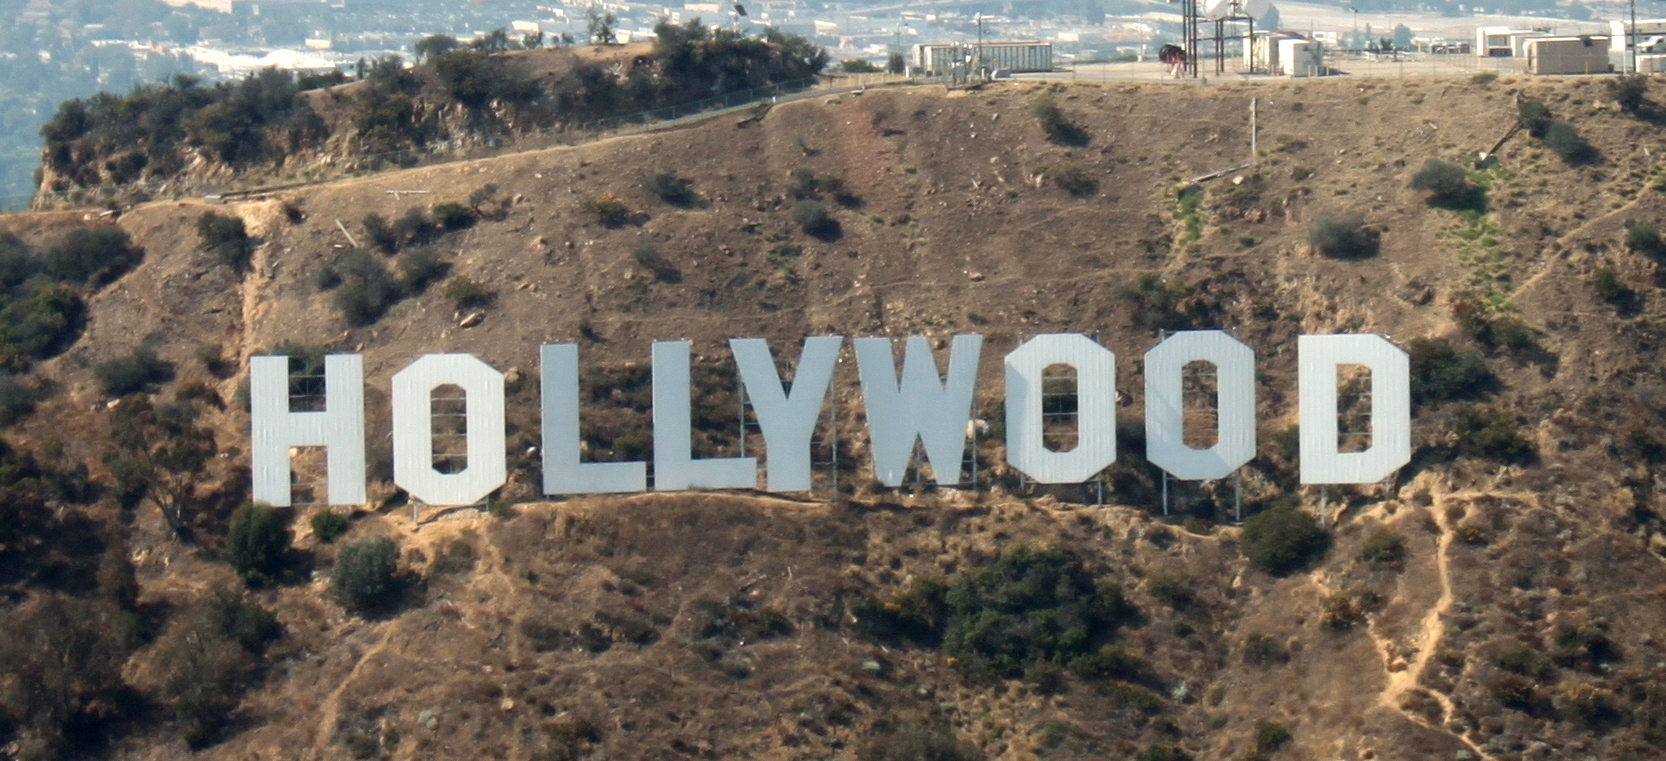

In [7]:
display(picture)

In [9]:
(picture.format, picture.size, picture.mode)

('JPEG', (1666, 761), 'RGB')

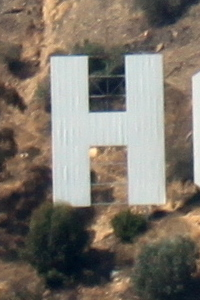

In [10]:
H = picture.crop(box=(200,300,400,600))
display(H)
H.save("H.jpg")

In [11]:
corner=picture.crop(box=(0,0,350,75))
graycorner=corner.convert("L")

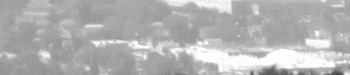

In [12]:
display(graycorner)

(0, 255)

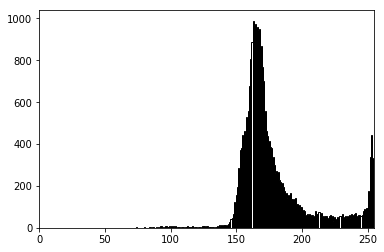

In [15]:
h=graycorner.histogram()
import matplotlib.pyplot as plt
%matplotlib inline
for i,j in zip(range(len(h)), h):
    plt.bar(i,j,color="white",edgecolor="black")
plt.xlim(0,255)

In [16]:
fullHistogram=corner.histogram()
binnedHistogram = [sum(fullHistogram[i*16:(i+1)*16])
for i in range(16)]

In [17]:
def equalize(picture):
    grayscale=picture.convert("L")
    Histogram = grayscale.histogram()
    LookUpTable = []
    levels=len(Histogram)
    average = sum(Histogram)/256
    n = 0
    for i in range(256):
        LookUpTable.append(n / average)
        n = n + Histogram[i]    
    return picture.point(LookUpTable)